In [6]:
# Statistics and data manipulation
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from statistics import mean

# Graphs and visuals
import matplotlib.pyplot as plt
import seaborn as sbs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

# Modeling
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

In [7]:
df= pd.read_csv('assignment.csv')

In [8]:
print("Features and Target classification column (output):")
names = df.columns.to_list()
print(names)
print("\n Shape of Dataset")
print(df.shape)

Features and Target classification column (output):
['Age', 'Sex', 'cp', 'RBP', 'EA', 'CA', 'Height', 'Weight', 'BMI', 'Timesinceheartattack', 'output']

 Shape of Dataset
(109, 11)


In [9]:
print("\n Inspection of first 5 elements")
print(df.head())


 Inspection of first 5 elements
    Age  Sex   cp    RBP   EA   CA  Height  Weight   BMI Timesinceheartattack  \
0  63.0  1.0  3.0  145.0  0.0  1.0    1.74   116.0  38.3                  5.2   
1  37.0  1.0  2.0  129.0  0.0  1.0    1.78    83.0  26.2                  0.8   
2  41.0  0.0  1.0  130.0  0.0  2.0    1.57    77.0  31.4                  2.3   
3  56.0  1.0  1.0  120.0  1.0  3.0    1.62    95.0  36.2                  4.7   
4  57.0  0.0  0.0  120.0  0.0  0.0    1.97    53.0  13.7                  6.1   

   output  
0     1.0  
1     0.0  
2     1.0  
3     1.0  
4     0.0  


In [10]:
print("\n General Statistics of Dataset")
print(df.describe().transpose())


 General Statistics of Dataset
        count      mean        std    min       25%     50%     75%     max
Age     100.0   52.0300   8.824272  29.00   45.0000   52.00   58.00   71.00
Sex     100.0    0.6200   0.487832   0.00    0.0000    1.00    1.00    1.00
cp      100.0    1.4100   0.954468   0.00    1.0000    2.00    2.00    3.00
RBP     100.0  126.2400  13.900164  94.00  118.7500  128.00  135.00  172.00
EA      100.0    0.2500   0.435194   0.00    0.0000    0.00    0.25    1.00
CA      100.0    1.6100   0.952350   0.00    1.0000    1.50    2.00    3.00
Height  100.0    1.7004   0.084087   1.51    1.6300    1.70    1.76    1.97
Weight  100.0   71.8900  11.744670  50.00   63.0000   71.00   80.00  116.00
BMI     100.0   24.8681   3.826164  13.70   22.9725   24.15   25.65   39.30
output  100.0    0.5600   0.498888   0.00    0.0000    1.00    1.00    1.00


In [11]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   100 non-null    float64
 1   Sex                   100 non-null    float64
 2   cp                    100 non-null    float64
 3   RBP                   100 non-null    float64
 4   EA                    100 non-null    float64
 5   CA                    100 non-null    float64
 6   Height                100 non-null    float64
 7   Weight                100 non-null    float64
 8   BMI                   100 non-null    float64
 9   Timesinceheartattack  101 non-null    object 
 10  output                100 non-null    float64
dtypes: float64(10), object(1)
memory usage: 9.5+ KB
None
Age                     9
Sex                     9
cp                      9
RBP                     9
EA                      9
CA                      9
Height            

In [12]:
cat_features = df[["Sex","cp","EA","CA","output"]]
num_features = df[["Age","RBP","Height","Weight","BMI","output"]]

In [ ]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.4)
for i,name in enumerate(cat_features):
    ax = plt.subplot(3,3,i+1)
    s=sbs.histplot(data=cat_features,x=name,hue="output",multiple="dodge",discrete=True,shrink=0.5)    
    ax.set_title(name)
plt.show()

In [14]:
cat_features_names= cat_features.columns.to_list()
tickvalues = range(0,len(cat_features_names))
chisqmatrix=pd.DataFrame(cat_features,columns=cat_features_names,index=cat_features_names)

In [15]:
def cramers_v_corr(confusion_m):    
    chi2 = stats.chi2_contingency(confusion_m)[0]
    n = confusion_m.to_numpy().sum()
    phi2 = chi2/n
    r,k = confusion_m.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [16]:
outercnt=0
innercnt=0
for icol in cat_features_names:
    for jcol in cat_features_names:
        # Converting to cross tab as for cHi-square test we have to first convert variables into contigency table
        mycrosstab=pd.crosstab(cat_features[icol],cat_features[jcol])
        # Calculate cramers corrected coefficient
        coeff= cramers_v_corr(mycrosstab)
        # Fill our correlation matrix
        chisqmatrix.iloc[outercnt,innercnt]=coeff
        innercnt+=1
    outercnt += 1
    innercnt = 0

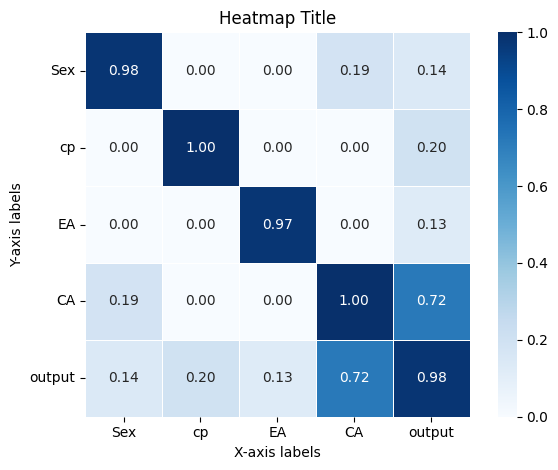

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming chisqmatrix is your DataFrame

# Create the heatmap
sns.heatmap(chisqmatrix, cmap="Blues", square=True, annot=True, fmt=".2f", linewidths=0.5)  # Adjust parameters as needed

# Customize aesthetics (optional)
plt.xlabel("X-axis labels")  # Replace with your actual labels
plt.ylabel("Y-axis labels")  # Replace with your actual labels
plt.title("Heatmap Title")  # Add a title
plt.xticks(rotation=0)  # Rotate x-axis labels for readability (optional)
plt.yticks(rotation=0)  # Rotate y-axis labels for readability (optional)
plt.tight_layout()

# Display the heatmap
plt.show()

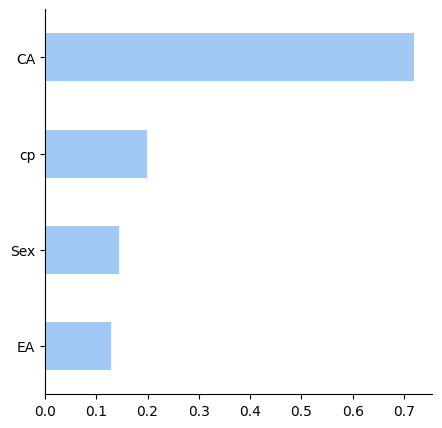

In [18]:
plt.figure(figsize=(5, 5))
sbs.set_palette("pastel")
abs(chisqmatrix['output']).sort_values()[:-1].plot.barh()
sbs.despine()
plt.show()

In [22]:
missing_values = df.isnull().sum()

# Encoding categorical variables
one_hot_encoder = OneHotEncoder()
# Encoding 'Sex' and 'EA' columns
sex_encoded = one_hot_encoder.fit_transform(df[['Sex']]).toarray()
ea_encoded = one_hot_encoder.fit_transform(df[['EA']]).toarray()
# Replace original columns with encoded ones
df['Sex_Male'] = sex_encoded[:, 0]
df['EA_Y'] = ea_encoded[:, 1]
# Drop the original categorical columns
print(df.columns)

# Standardizing numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'cp', 'RBP', 'CA', 'Height', 'Weight', 'BMI', 'Timesinceheartattack']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Index(['Age', 'Sex', 'cp', 'RBP', 'EA', 'CA', 'Height', 'Weight', 'BMI',
       'Timesinceheartattack', 'output', 'Sex_Male', 'EA_Y'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the target variable
df.dropna(subset=['output'], inplace=True)

# Splitting dataset into training and testing sets
X = df.drop('output', axis=1)  # Features
y = df['output']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Choosing machine learning algorithm
clf = RandomForestClassifier(random_state=42)

# Training the model
clf.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test_imputed)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance Metrics:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



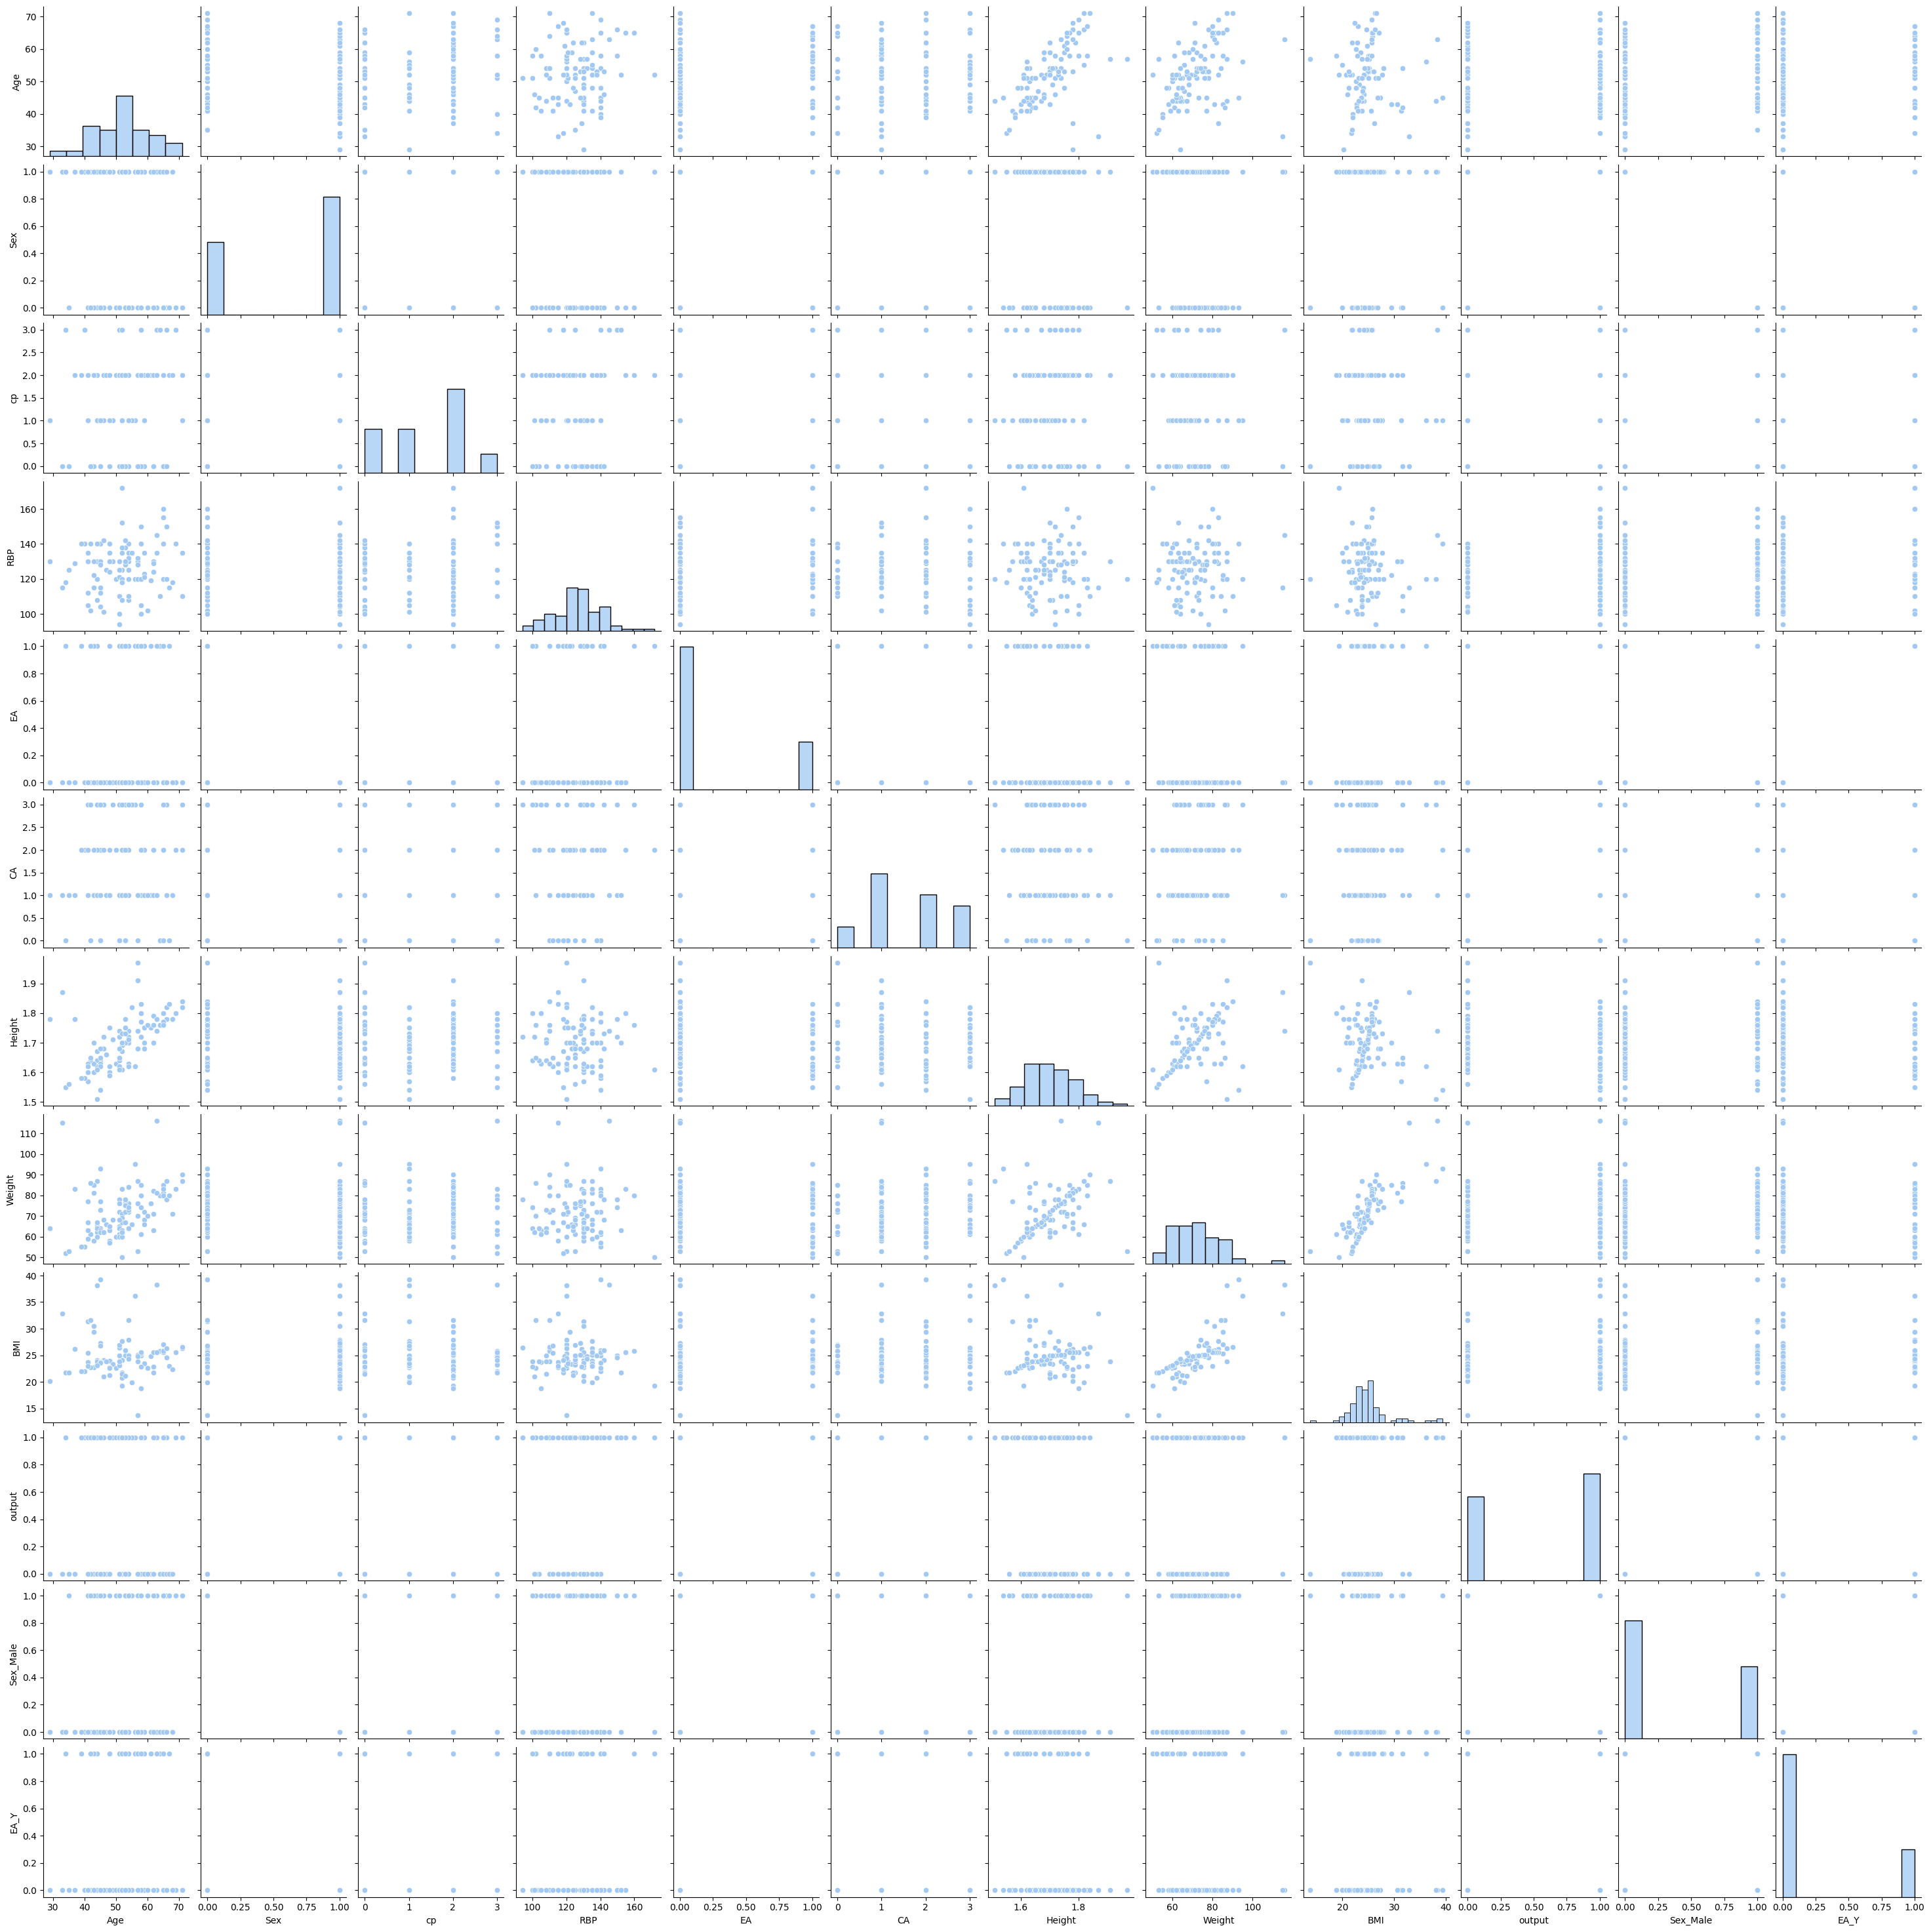

In [21]:
# Visualizing the distribution of features
sns.pairplot(df)
plt.show()


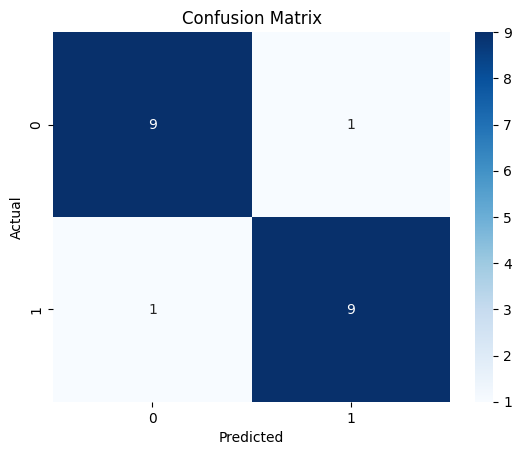

In [24]:
# Visualizing model performance metrics (confusion matrix)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

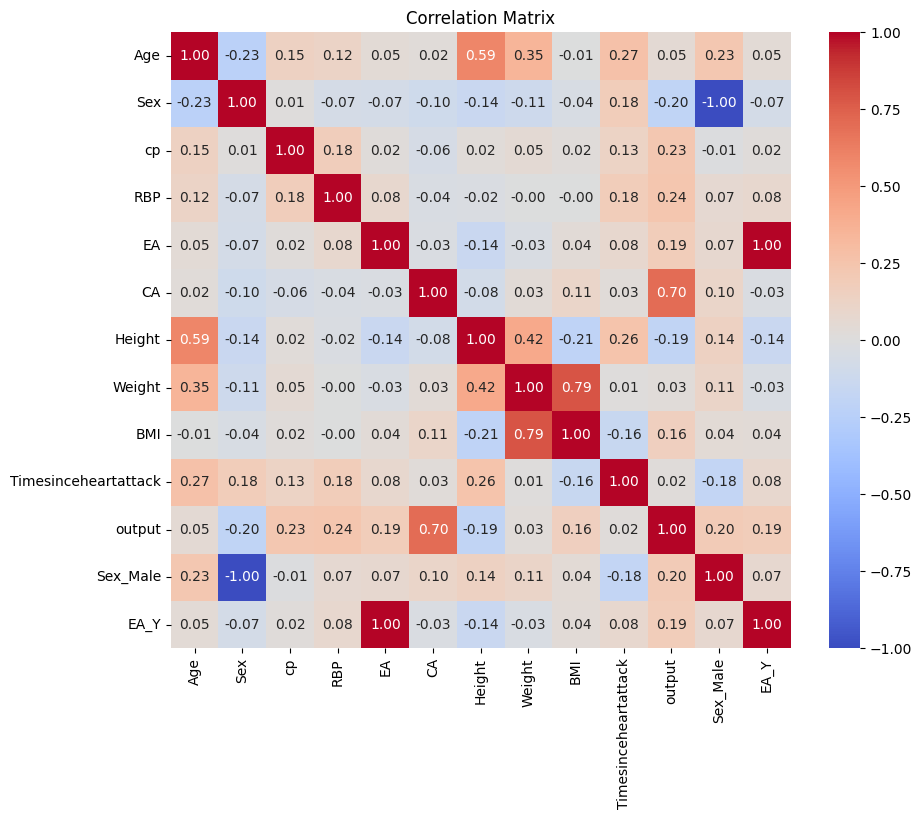

In [25]:
# Exploring relationships between features (correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

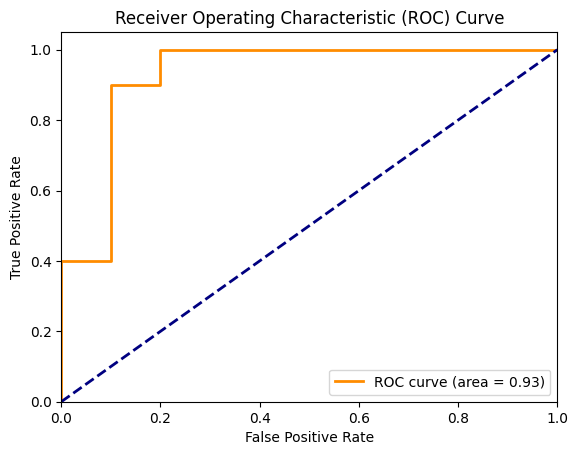

In [28]:
# Choosing machine learning algorithm
clf = RandomForestClassifier(random_state=42)

# Training the model with feature names
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Visualizing ROC curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
